# Import statements


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scp 
from numpy.linalg import eig

# Linear system dynamics (n = 2) 

In [21]:
A = np.array([[10,-3],[3,5]])
x0 = [0.2,0.2]

def field(t,vec):
    return np.matmul(A,vec)

# Eigenvalues and eigenvectors

In [43]:
e_val, e_vec = eig(A)

plt_str = "b-"
if (np.iscomplex([e_val[0]])):
    plt_str = "r-"


# Phase portrait

In [13]:
# Define statespace
x1 = np.linspace(-1.0, 1.0, 25)
x2 = np.linspace(-1.0, 1.0, 25)

X1, X2 = np.meshgrid(x1, x2)
u, v = np.zeros(X1.shape), np.zeros(X2.shape)

NI, NJ = X1.shape

# Calculating the field based on the positions 
for i in range(NI):
    for j in range(NJ):
        x,y = X1[i, j],X2[i, j]
        vec = field([x, y])
        u[i,j],v[i,j] = vec[0],vec[1]
     

# Orbit


In [29]:
flow = scp.solve_ivp(field,[0,5],x0)

# Plotting

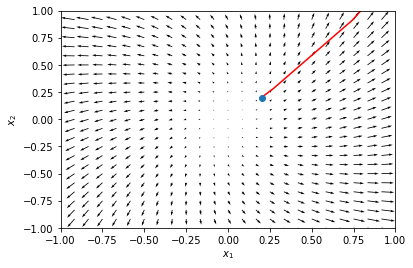

In [44]:
Q = plt.quiver(X1, X2, u, v)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-1, 1])
plt.ylim([-1, 1])


# Orbit
plt.plot(flow.y[0], flow.y[1], plt_str) # path
plt.plot(flow.y[0][0], flow.y[1][0], 'o') # start